In [43]:
import string;
import gensim
from gensim import corpora, models
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE

In [15]:
docs = []
titles = []
locations = []
lines = ''
title = ''
location = ''

In [16]:
with open('unique.txt', 'r') as rf:
    for line in rf:
        if location == '':
            location = line[:-1]
            locations.append(location)
        if title == '':
            title = line[:-1]
            titles.append(title)
            location = ''
        if line == 'zzz\n':
            docs.append(lines)
            lines = ''
            title = ''
            location = ''
        else:
            lines = lines+line 

In [17]:
# stop words
en_stop = get_stop_words('en')

In [18]:
# stemmer
p_stemmer = PorterStemmer()

In [19]:
documents = []

for i in docs:
    # tokenize text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [x.lower() for x in tokenizer.tokenize(i)]
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    documents.append(stemmed_tokens)

In [20]:
# turn tokenize documents into a id - term dictionary
dictionary = corpora.Dictionary(documents)

In [21]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(document) for document in documents]

In [70]:
# creating object for LDA model
Lda = gensim.models.ldamodel.LdaModel

# run and train LDA model with 50 topics
ldamodel_50 = Lda(corpus, num_topics=50, id2word=dictionary, passes=20)

# visualize the model
vis_data_50 = gensimvis.prepare(ldamodel_50, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis_data_50)

In [71]:
# run and train LDA model with 25 topics
ldamodel_25 = Lda(corpus, num_topics=25, id2word=dictionary, passes=20)

# visualize the model
vis_data_25 = gensimvis.prepare(ldamodel_25, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis_data_25)

In [72]:
# run and train LDA model with 10 topics
ldamodel_10 = Lda(corpus, num_topics=10, id2word=dictionary, passes=20)

# visualize the model
vis_data_10 = gensimvis.prepare(ldamodel_10, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis_data_10)

In [61]:
# creating object for LDA model
Lda = gensim.models.ldamodel.LdaModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word=dictionary, passes=20)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values

In [48]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=10, limit=51, step=5)

In [64]:
# Can take a long time to run, second half
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=55, limit=76, step=5)

55
60
65
70
75


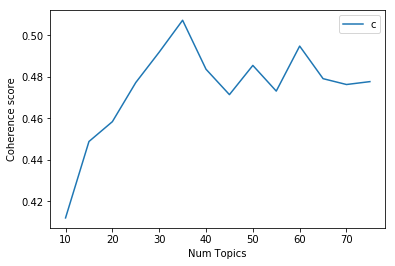

In [69]:
# Show graph
limit=76; start=10; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values + coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [70]:
# Print the coherence scores
for m, cv in zip(x, coherence_values + coherence_values_2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.412
Num Topics = 15  has Coherence Value of 0.4488
Num Topics = 20  has Coherence Value of 0.4584
Num Topics = 25  has Coherence Value of 0.4772
Num Topics = 30  has Coherence Value of 0.4919
Num Topics = 35  has Coherence Value of 0.5072
Num Topics = 40  has Coherence Value of 0.4836
Num Topics = 45  has Coherence Value of 0.4714
Num Topics = 50  has Coherence Value of 0.4855
Num Topics = 55  has Coherence Value of 0.4731
Num Topics = 60  has Coherence Value of 0.4948
Num Topics = 65  has Coherence Value of 0.4791
Num Topics = 70  has Coherence Value of 0.4763
Num Topics = 75  has Coherence Value of 0.4777


In [71]:
# choose the model with the highest Conherence value 
# num_topics = 35
optimal_model = model_list[5]

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary)
vis

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.133639  0.045061       1        1  8.621922
16    -0.180465 -0.098557       2        1  8.391413
20    -0.164134 -0.008655       3        1  7.734576
17    -0.026292  0.202260       4        1  6.721155
3     -0.077232  0.060269       5        1  4.717675
12    -0.094992  0.051979       6        1  4.149415
23    -0.101554 -0.096136       7        1  3.912451
26    -0.113540 -0.165751       8        1  3.701568
10    -0.094196 -0.008416       9        1  3.679960
34    -0.075120 -0.177895      10        1  3.666912
1     -0.004735  0.114542      11        1  3.543276
18     0.021472  0.093817      12        1  3.055426
4     -0.080820 -0.047978      13        1  2.854488
6     -0.083372  0.048813      14        1  2.821574
14     0.045900  0.115401      15        1  2.637519
22    -0.055260 -0.038549      16        1  2.626371
32     0.030403  0.226221      17        1  2.577479
0     -0.041248 -0.053847      18        1  2.553204
29    -0.086583  0.087445      19        1  2.382345
30    -0.071919  0.072852      20        1  2.155919
15    -0.010101 -0.152896      21        1  1.838588
33    -0.071118  0.053606      22        1  1.729956
25    -0.008038 -0.130470      23        1  1.674881
5      0.048282  0.143868      24        1  1.643876
2     -0.039197 -0.147956      25        1  1.643572
9      0.021705 -0.015112      26        1  1.566829
31    -0.020561 -0.069985      27        1  1.446839
28     0.012785 -0.204283      28        1  1.252859
8      0.098860  0.181554      29        1  1.236777
21    -0.005374  0.112934      30        1  0.874330
11     0.146750 -0.052781      31        1  0.824784
19     0.142936  0.069811      32        1  0.747217
13     0.346577 -0.069364      33        1  0.418205
24     0.350013 -0.060423      34        1  0.339307
27     0.373807 -0.081378      35        1  0.257333, topic_info=       Category           Freq              Term          Total  loglift  \
term                                                                       
267     Default   60967.000000            custom   60967.000000  30.0000   
521     Default   27939.000000           patient   27939.000000  29.0000   
467     Default   77158.000000            servic   77158.000000  28.0000   
352     Default   23477.000000              sale   23477.000000  27.0000   
504     Default   23049.000000              data   23049.000000  26.0000   
624     Default   86675.000000             manag   86675.000000  25.0000   
520     Default   42196.000000             offic   42196.000000  24.0000   
589     Default   38952.000000            employ   38952.000000  23.0000   
151     Default   43925.000000           program   43925.000000  22.0000   
18      Default   48969.000000            applic   48969.000000  21.0000   
3       Default   68237.000000              abil   68237.000000  20.0000   
148     Default   35461.000000           product   35461.000000  19.0000   
123     Default   55050.000000              must   55050.000000  18.0000   
219     Default  132730.000000              work  132730.000000  17.0000   
62      Default   42700.000000           develop   42700.000000  16.0000   
224     Default   17587.000000                00   17587.000000  15.0000   
791     Default   13650.000000           student   13650.000000  14.0000   
516     Default   21769.000000             medic   21769.000000  13.0000   
421     Default   37224.000000           employe   37224.000000  12.0000   
864     Default   17473.000000           account   17473.000000  11.0000   
176     Default   71930.000000                 s   71930.000000  10.0000   
1972    Default   32568.000000           project   32568.000000   9.0000   
261     Default   56602.000000            commun   56602.000000   8.0000   
198     Default   55303.000000              team   55303.000000   7.0000   
375     Default   22

In [72]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,17.0,0.2873,"work, team, will, peopl, s, help, make, look, ...","[make, toxic, free, advoc, chicago, il, make, ..."
1,1,17.0,0.3570,"work, team, will, peopl, s, help, make, look, ...","[1, real, estat, team, hire, glen, ellyn, il, ..."
2,2,22.0,0.2291,"softwar, experi, system, develop, engin, test,...","[1175, jr, softwar, engin, huntington, beach, ..."
3,3,10.0,0.5853,"patient, medic, care, health, clinic, provid, ...","[1000, sign, bonu, certifi, medic, assist, mul..."
4,4,33.0,0.2568,"servic, client, work, social, provid, agenc, c...","[1200, bonu, certifi, regist, drug, alcohol, c..."
5,5,10.0,0.4368,"patient, medic, care, health, clinic, provid, ...","[13, hr, full, time, day, eve, caregiv, offer,..."
6,6,28.0,0.3618,"clean, area, work, equip, mainten, maintain, f...","[14, 00, hr, laundri, attend, weekend, includ,..."
7,7,10.0,0.3845,"patient, medic, care, health, clinic, provid, ...","[14, hr, 14, per, hour, caregiv, companion, hh..."
8,8,10.0,0.3643,"patient, medic, care, health, clinic, provid, ...","[14, hr, 14, per, hour, child, caregiv, compan..."
9,9,20.0,0.3055,"skill, abil, work, commun, experi, excel, must...","[15, 00, per, hour, 1st, shift, receiv, offic,..."


In [73]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7737,"driver, must, vehicl, licens, drive, requir, s...","[buri, drop, subcontractor, hutto, tx, 78634, ..."
1,1.0,0.8778,"employ, statu, disabl, applic, equal, veteran,...","[warehous, san, francisco, ca, job, descript, ..."
2,2.0,0.5700,"data, research, analysi, report, analyt, analy...","[data, integr, program, manag, amp, analyt, da..."
3,3.0,0.7770,"applic, posit, requir, experi, will, year, emp...","[custodian, albuquerqu, nm, perform, custodi, ..."
4,4.0,0.6595,"coordin, administr, assist, support, manag, of...","[execut, assist, tulsa, ok, process, mail, ans..."


In [74]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,17.0,"work, team, will, peopl, s, help, make, look, ...",1119.0,0.0285
1,17.0,"work, team, will, peopl, s, help, make, look, ...",744.0,0.0190
2,22.0,"softwar, experi, system, develop, engin, test,...",218.0,0.0056
3,10.0,"patient, medic, care, health, clinic, provid, ...",1511.0,0.0385
4,33.0,"servic, client, work, social, provid, agenc, c...",878.0,0.0224


In [75]:
topics = {}
vectors = []
for i,idx in enumerate(documents):
        bow = dictionary.doc2bow(idx)
        v = optimal_model.get_document_topics(bow)
        topics[i] = v
        dict = {}
        for j,jdx in enumerate(v):
            dict[jdx[0]] = jdx[1]

        vector = []
        for k in range(25):
            if k in dict.keys():
                vector.append(dict[k])
            else:
                vector.append(0)
        
        vectors.append(np.asarray([vector]))

In [76]:
def top_5_similar(vectors):
    for j in range(5):
        index = np.random.randint(0,len(vectors)-1)
        cosines = {}
        euclideans = {}
        for i,ind in enumerate(vectors):
            if i != index:
                cosines[sklearn.metrics.pairwise.cosine_similarity(vectors[index],vectors[i])[0][0]] = i
                euclideans[sklearn.metrics.pairwise.euclidean_distances(vectors[index],vectors[i])[0][0]] = i

        top_5_cosine = sorted(cosines.keys(), reverse=True)[:6]
        top_5_euclidean = sorted(euclideans.keys())[:6]
        print("\nTop 5 cosine similarity to:", titles[index])
        for i,indx in enumerate(top_5_cosine):
            print("  ", round(top_5_cosine[i], 3), titles[cosines[top_5_cosine[i]]])
            
        print("Lowest 5 euclidean distance from:", titles[index])
        for k,inx in enumerate(top_5_euclidean):
            print("  ", round(top_5_euclidean[k], 3), titles[euclideans[top_5_euclidean[k]]])

In [77]:
top_5_similar(vectors)


Top 5 cosine similarity to: Assessment and Database Coordinator
   1.0 Assessment and Database Coordinator
   0.953 Principal Administrative Assistant
   0.944 Part-time, Administrative Support Specialist - SBDC
   0.936 Disbursement Coordinator
   0.936 Assistant Housekeeping Coordinator
   0.933 Secretary / Receptionist
Lowest 5 euclidean distance from: Assessment and Database Coordinator
   0.0 Assessment and Database Coordinator
   0.09 Secretary / Receptionist
   0.096 OFFICE ASSISTANT - DALTON
   0.096 OFFICE ASSISTANT - DALTON
   0.101 Part-time, Administrative Support Specialist - SBDC
   0.11 Coordinator of Hunter College SPELL and COPE Programs

Top 5 cosine similarity to: Visual Designer (Core Web Team)
   0.973 Creative Director
   0.969 Lead Designer, Advanced Technology and Projects
   0.957 Jr. Game Server Engineer
   0.957 Digital Marketing Manager, Latin America
   0.946 VUI Designer
   0.941 Lead UI Product Designer
Lowest 5 euclidean distance from: Visual Designer (